<a href="https://colab.research.google.com/github/truyenaaa123/CS114.L22.KHCL/blob/main/BaiTapColab/BaiTap1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>CS114.L21.KHCL - MACHINE LEARNING</b></h1>
<h1 align="center"><b>Bài tập colab số 01. sklearn hand-written digits recognition</b></h1>

In [ ]:
import matplotlib.pyplot as plt
 
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

## Load dataset có sẵn trong thư viện sklearn

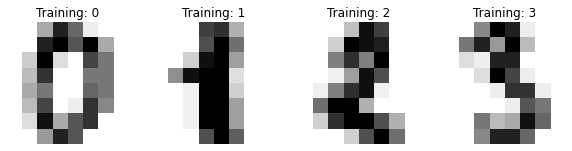

In [ ]:
#Load data
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## Tạo mô hình bằng phương pháp SVC (Support Vector Classifier)

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
 
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)
 
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)
 
# Learn the digits on the train subset
clf.fit(X_train, y_train)
 
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

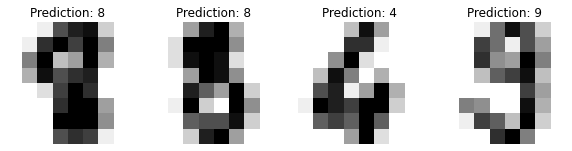

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

## Đánh giá kết quả

In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


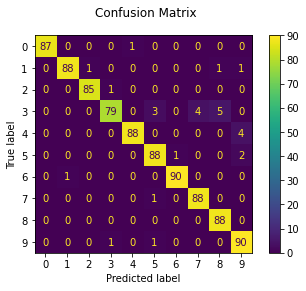

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
 
plt.show()

## Chụp ảnh trên webcam bằng Colab

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
 
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
 
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
 
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
 
      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
 
      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
 
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to images/image-1.jpg


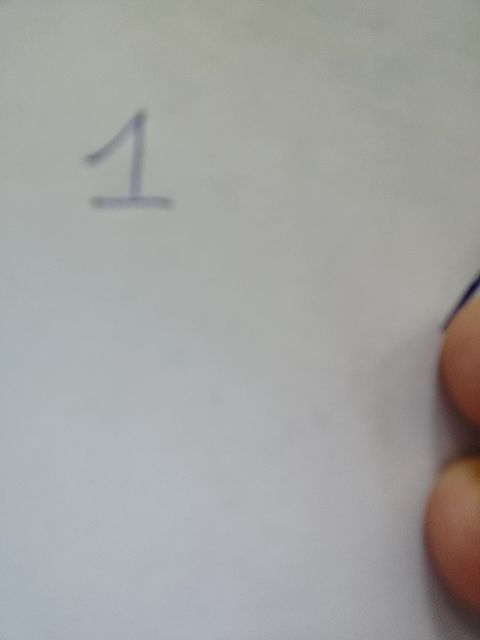

Please label your image: 1


In [ ]:
import os
from IPython.display import Image
 
# Tạo thư mục chứa ảnh chụp
DIR = 'images'
if not os.path.exists(DIR):
    os.makedirs(DIR)
 
# Lấy đường dẫn ảnh
def image_name(n):
  return f'{DIR}/image-{n}.jpg'
 
try:
  # Chụp nhiều ảnh thì tự động tăng i lên tránh ghi đè ảnh cũ
  i = 0
  while os.path.isfile(image_name(i)):
    i += 1
  filename = take_photo(image_name(i))
  print('Saved to {}'.format(filename))
  
  # Hiện cái ảnh mới vừa chụp xong
  display(Image(filename))
 
  # Gán label cho ảnh vừa chụp
  while True:
    label = int(input("Please label your image: "))
    if label in range(0, 10):
      break
 
  my_data.append([label, filename])
 
except Exception as err:
  # Lỗi nếu như người dùng ko có webcam hoặc là người dùng từ chối
  # cấp quyền truy cập camera
  print(str(err))

In [ ]:
##Xử lý ảnh

In [ ]:
from skimage import color
from skimage import io
import numpy as np
import mat
import cv2

In [ ]:
import cv2
import numpy as np


img = cv2.pyrDown(cv2.imread('/content/drive/MyDrive/HK4/Machine Learning/BaiTap1/so.jpeg', cv2.IMREAD_UNCHANGED))


ret, threshed_img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
                127, 255, cv2.THRESH_BINARY)
contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
img = img = color.rgb2gray(np.rot90(img,3))
img_test = img[x:x+w, y:y+h]
plt.imshow(img_test, cmap='gray')
plt.show()
print(len(contours))
plt.imshow(img, cmap='gray')
plt.show()
crop4 = np.resize(img_test, (8,8))
plt.imshow(crop4, cmap='gray')
plt.show()

crop3 = cv2.resize(img_test, (8,8), interpolation = cv2.INTER_AREA)
plt.imshow(crop3, cmap='gray')
plt.show()

error: ignored

In [ ]:
from os import listdir
arr = '/content/drive/MyDrive/HK4/Machine Learning/BaiTap1/'
files = listdir(arr)


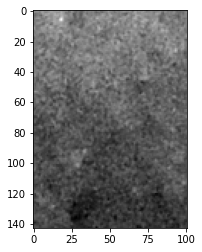

8499


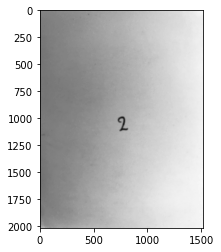

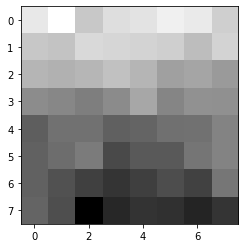

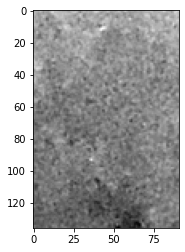

13347


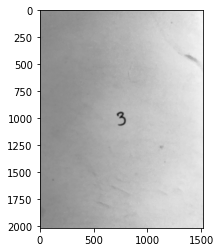

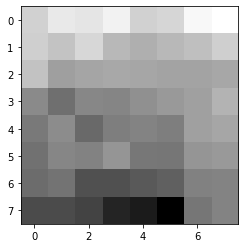

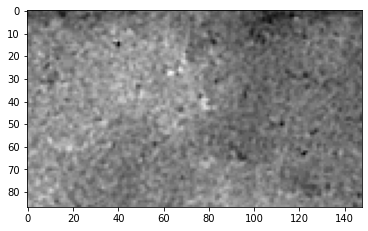

804


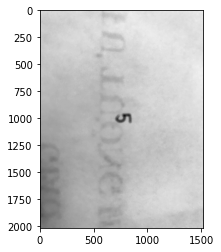

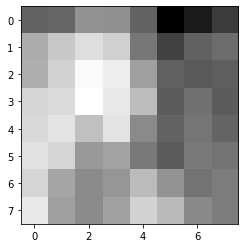

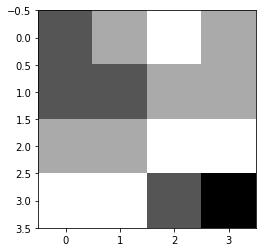

481


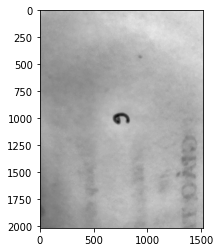

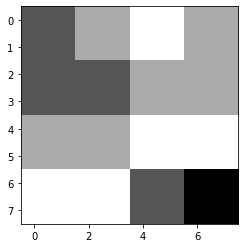

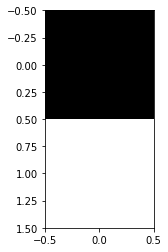

1812


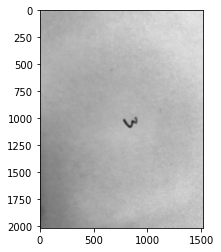

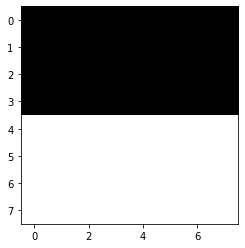

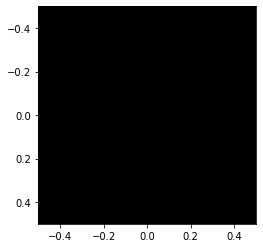

3


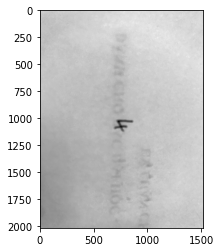

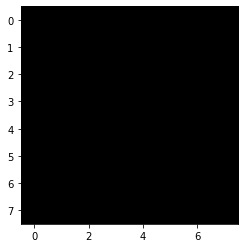

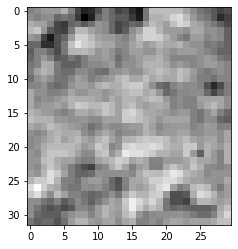

3560


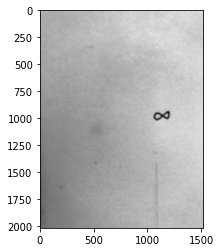

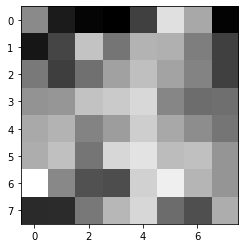

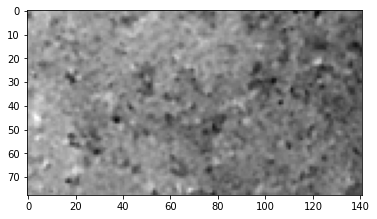

2863


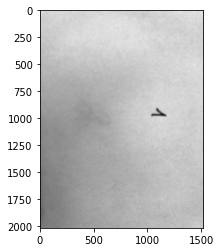

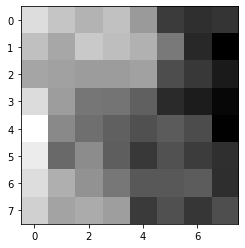

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  app.launch_new_instance()


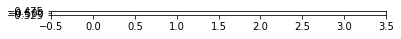

5724


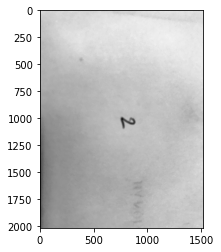

error: ignored

In [ ]:
import cv2
import numpy as np
from skimage import color
import matplotlib.pyplot as plt

for file in files:
  mg = cv2.pyrDown(cv2.imread(arr+file, cv2.IMREAD_UNCHANGED))

  ret, threshed_img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
                  127, 255, cv2.THRESH_BINARY)
  contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  for c in contours:
      x, y, w, h = cv2.boundingRect(c)
  img = img = color.rgb2gray(np.rot90(img,3))
  img_test = img[x:x+w, y:y+h]
  plt.imshow(img_test, cmap='gray')
  plt.show()
  print(len(contours))
  plt.imshow(img, cmap='gray')
  plt.show()
  crop3 = cv2.resize(img_test, (8,8), interpolation = cv2.INTER_AREA)
  plt.imshow(crop3, cmap='gray')
  plt.show()

In [ ]:

import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from imutils.perspective import four_point_transform
from imutils import contours
import imutils
from imutils.contours import sort_contours
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

img = cv2.imread(arr+files[3])
im = img.copy()

gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)
thresh = cv2.adaptiveThreshold(blur,255,1,1,11,2)

contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

a = []
for cnt in contours:
    if cv2.contourArea(cnt)>50:
        [x,y,w,h] = cv2.boundingRect(cnt)

        if  h>28:
            a.append([x,y,x+w,y+h])
            cv2.rectangle(im,(x,y),(x+w,y+h),(0,0,255),2)
            roi = thresh[y:y+h,x:x+w]
            roismall = cv2.resize(roi,(10,10))            
            key = cv2.waitKey(0)
cv2_imshow(im)

In [ ]:
import cv2
import numpy as np
from skimage import color
import matplotlib.pyplot as plt

for file in files:
  img = cv2.pyrDown(cv2.imread(arr+file, cv2.IMREAD_UNCHANGED))
  ret, threshed_img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
                  127, 255, cv2.THRESH_BINARY)
  contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  
  for c in contours:
      x, y, w, h = cv2.boundingRect(c)
  img = color.rgb2gray(img)                                    
  img_test = img[x:x+w, y:y+h]
  img = np.rot90(img,3)
  plt.imshow(img_test, cmap='gray')
  plt.show()
  print(len(contours))
  plt.imshow(img, cmap='gray')
  plt.show()

  crop3 = cv2.resize(img_test, (8,8), interpolation = cv2.INTER_AREA)
  plt.imshow(crop3, cmap='gray')
  plt.show()

980 698 143 101


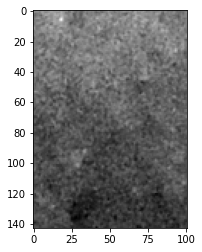

8499


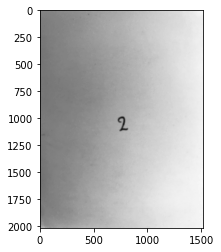

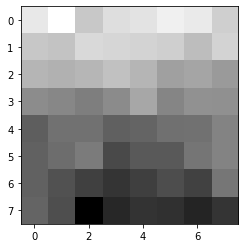

937 717 136 91


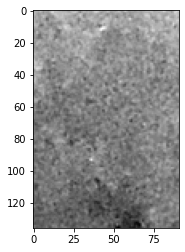

13347


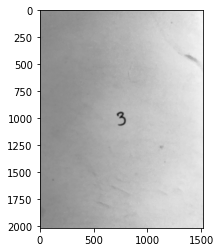

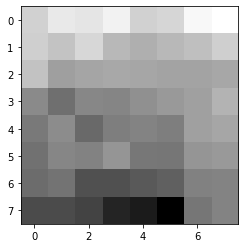

956 669 87 148


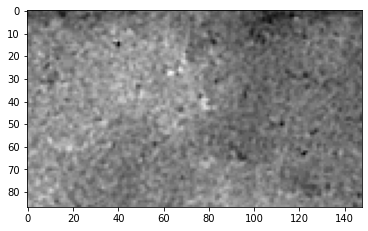

804


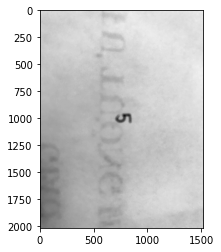

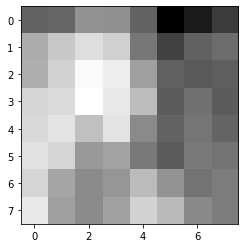

1289 97 4 4


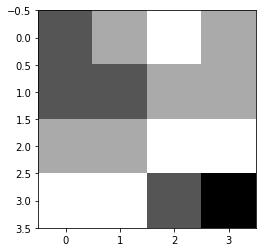

481


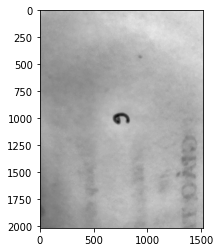

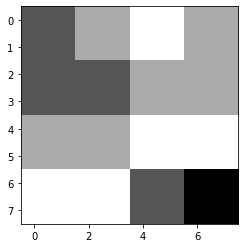

1000 619 2 1


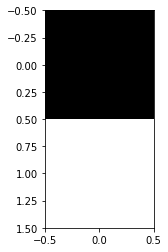

1812


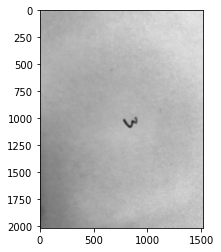

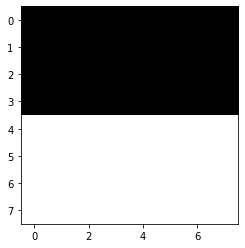

1022 667 1 1


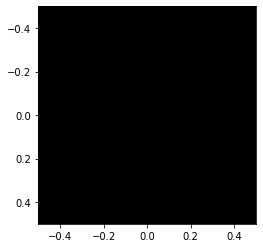

3


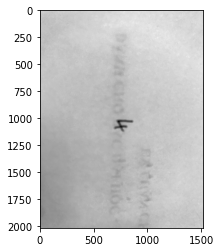

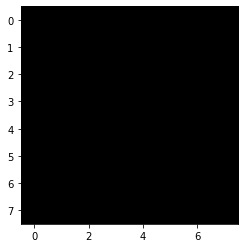

958 333 32 30


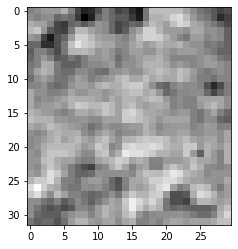

3560


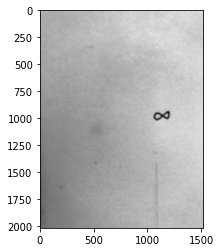

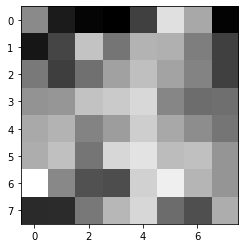

907 348 78 141


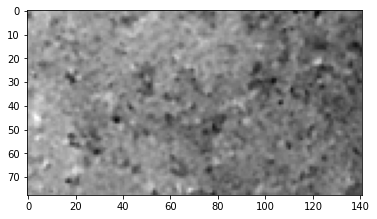

2863


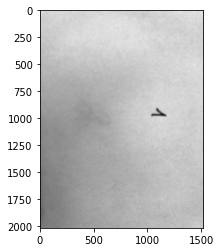

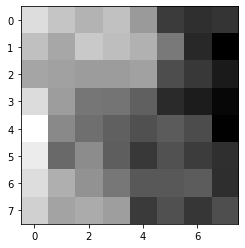

1578 576 3 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.


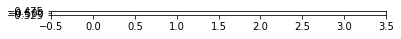

5724


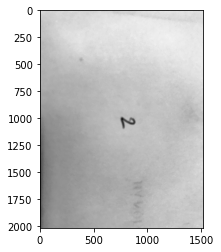

error: ignored

In [ ]:
import numpy as np
from skimage import color
import matplotlib.pyplot as plt

for file in files:
  img = cv2.pyrDown(cv2.imread(arr+file, cv2.IMREAD_UNCHANGED))
  ret, threshed_img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
                  127, 255, cv2.THRESH_BINARY)
  contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  
  for c in contours:
      x, y, w, h = cv2.boundingRect(c)
  print(x,y,w,h)
  img = color.rgb2gray(img)                                    
  img_test = img[x:x+w, y:y+h]
  img = np.rot90(img,3)
  plt.imshow(img_test, cmap='gray')
  plt.show()
  print(len(contours))
  plt.imshow(img, cmap='gray')
  plt.show()

  crop3 = cv2.resize(img_test, (8,8), interpolation = cv2.INTER_AREA)
  plt.imshow(crop3, cmap='gray')
  plt.show()